# Explore Exercises

In [1]:
import pyspark
from pyspark.sql.functions import *
import wrangle
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

plt.ion()
# tweak the matplotlib style defaults
plt.rc("figure", figsize=(13, 7))
plt.rc("font", size=14)
plt.style.use("ggplot")

### Get the Data

In [2]:
spark = pyspark.sql.SparkSession.builder.getOrCreate()

df = wrangle.wrangle_311(spark)

[wrangle.py] reading case.csv
[wrangle.py] handling data types
[wrangle.py] parsing dates
[wrangle.py] adding features
[wrangle.py] joining departments


__1) How many different cases are there, by department?__

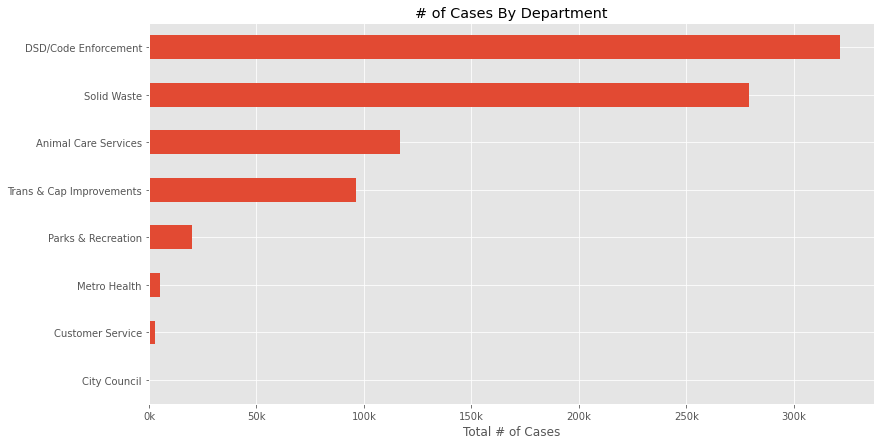

In [3]:
def format_number(x, *args):
    return "{:.0f}k".format(x / 1000)


(
    df.groupby("department")
    .count()
    .toPandas()
    .set_index("department")["count"]
    .sort_values()
    .plot.barh()
)
plt.gca().set(
    ylabel="", xlabel="Total # of Cases", title="# of Cases By Department"
)
plt.gca().xaxis.set_major_formatter(mpl.ticker.FuncFormatter(format_number))

__2) Does the percentage of cases that are late vary by department?__

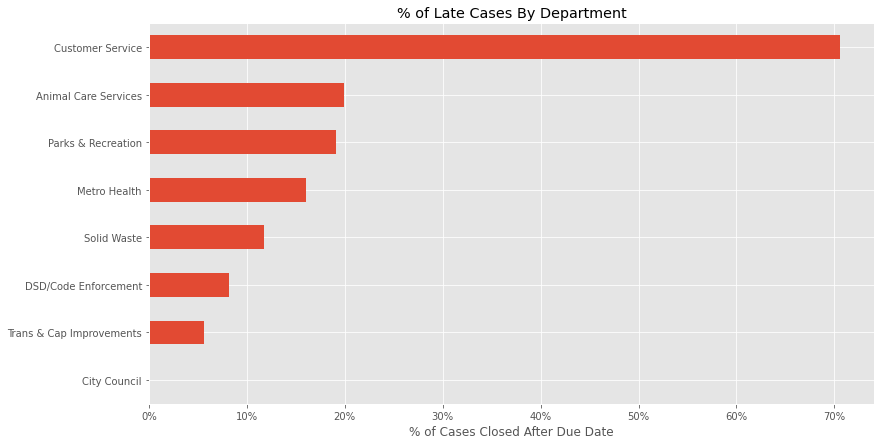

In [5]:
(
    df.withColumn("case_late", col("case_late").cast("int"))
    .groupby("department")
    .agg(avg("case_late").alias("p_cases_late"))
    .toPandas()
    .set_index("department")
    .p_cases_late.sort_values()
    .plot.barh()
)
plt.gca().xaxis.set_major_formatter(mpl.ticker.FuncFormatter("{:.0%}".format))
plt.gca().set(
    ylabel="",
    xlabel="% of Cases Closed After Due Date",
    title="% of Late Cases By Department",
)
plt.show()

__3) On average, how late are the late cases by department?__

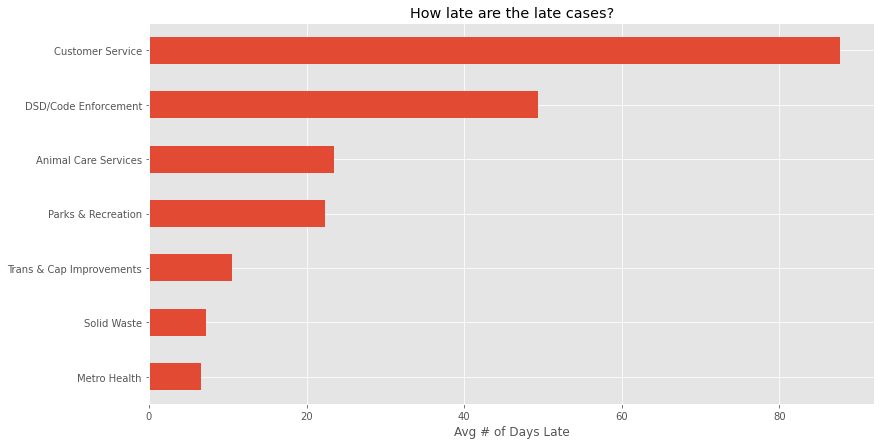

In [7]:
(
    df.filter("case_late")
    .groupby("department")
    .agg(avg("num_days_late").alias("avg_days_late"))
    .toPandas()
    .set_index("department")
    .avg_days_late.sort_values()
    .plot.barh()
)

plt.gca().set(
    ylabel="",
    xlabel="Avg # of Days Late",
    title="How late are the late cases?",
)
plt.show()

__4) What is the service type that is the most late? Just for Parks & Rec?__

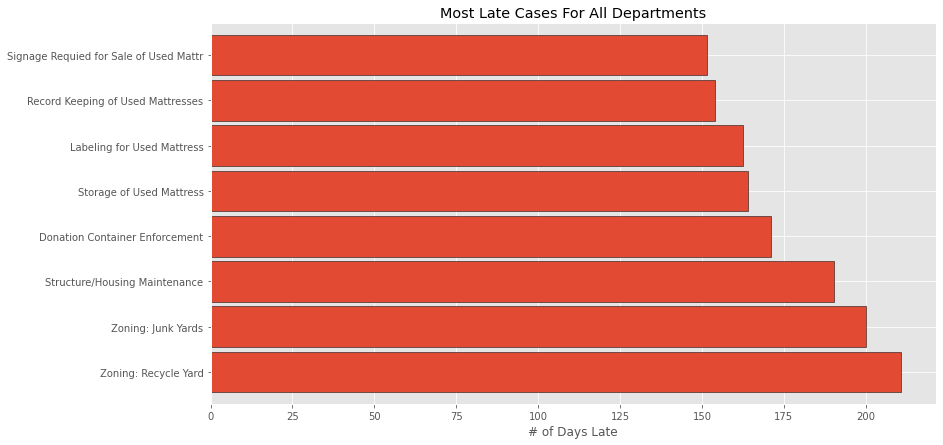

In [10]:
(
    df.filter(df.case_late)
    .groupby("service_request_type")
    .agg(mean("num_days_late").alias("avg_days_late"))
    .sort(desc("avg_days_late"))
    .limit(8)  # limit in spark, not pandas
    .toPandas()
    .set_index("service_request_type")
    .avg_days_late
    .plot.barh(ec="black", width=0.9)
)

plt.gca().set(
    title="Most Late Cases For All Departments",
    xlabel="# of Days Late",
    ylabel="",
)
plt.show()

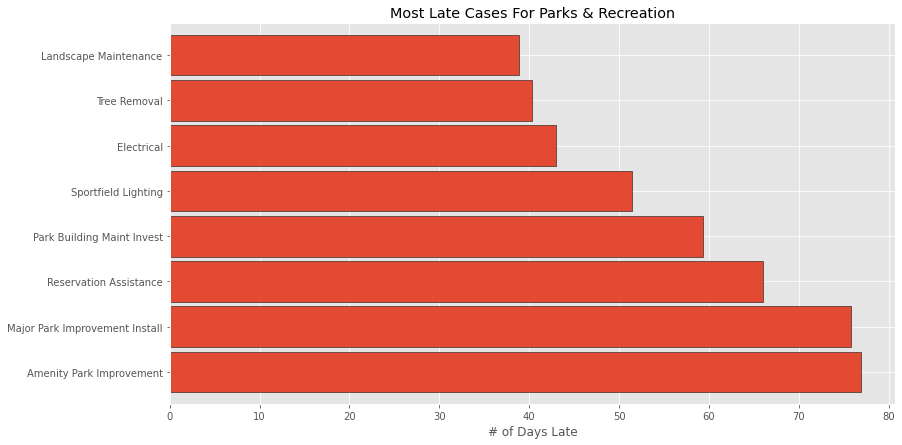

In [8]:
(
    df.filter(df.case_late)
    .filter(df.department == "Parks & Recreation")
    .groupby("service_request_type")
    .agg(mean("num_days_late").alias("avg_days_late"))
    .sort(desc("avg_days_late"))
    .limit(8)  # limit in spark, not pandas
    .toPandas()
    .set_index("service_request_type")
    .avg_days_late
    .plot.barh(ec="black", width=0.9)
)

plt.gca().set(
    title="Most Late Cases For Parks & Recreation",
    xlabel="# of Days Late",
    ylabel="",
)
plt.show()

__5) For the DSD/Code Enforcement department, what are the most common service request types? Look at other departments too.__

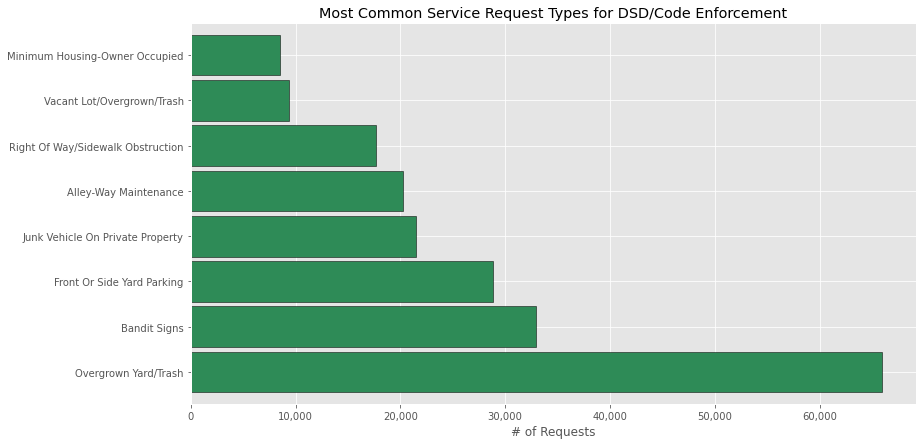

In [11]:
def format_number_sub_thousands(x, *args):
    return "{:.0f}k".format(x / 1000)

(
    # comment out / switch the filter statement to view different departments
    df.filter(expr('department == "DSD/Code Enforcement"'))
    #df.filter(expr('department == "Parks & Recreation"'))    
    .groupby("service_request_type")
    .count()
    .sort(desc("count"))
    .limit(8)
    .toPandas()
    .set_index("service_request_type")["count"]
    .plot.barh(color="seagreen", width=0.9, ec="black")
)

plt.gca().set(
    ylabel="",
    xlabel="# of Requests",
    title="Most Common Service Request Types for DSD/Code Enforcement",
)

# demonstrating several ways of formatting the x axis number ticks
# plt.gca().xaxis.set_major_formatter(mpl.ticker.FuncFormatter(format_number))
# plt.gca().xaxis.set_major_formatter(mpl.ticker.FuncFormatter(format_number_sub_thousands))
plt.gca().xaxis.set_major_formatter(mpl.ticker.FuncFormatter('{:,.0f}'.format))

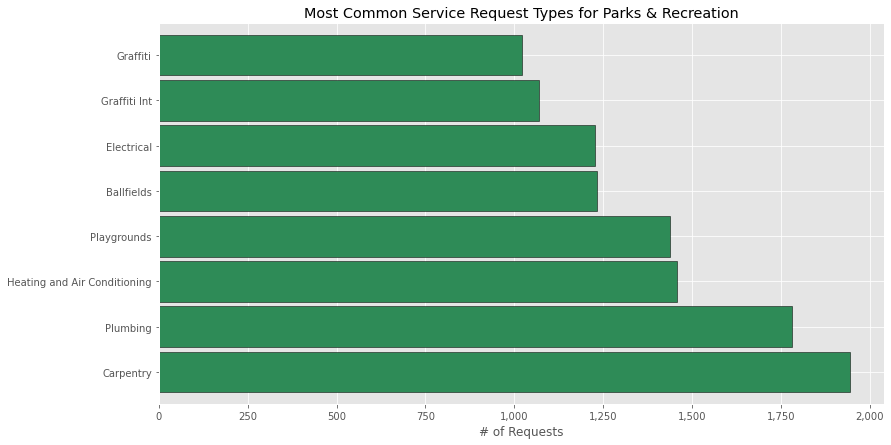

In [12]:
(
    # comment out / switch the filter statement to view different departments
    #df.filter(expr('department == "DSD/Code Enforcement"'))
    df.filter(expr('department == "Parks & Recreation"'))    
    .groupby("service_request_type")
    .count()
    .sort(desc("count"))
    .limit(8)
    .toPandas()
    .set_index("service_request_type")["count"]
    .plot.barh(color="seagreen", width=0.9, ec="black")
)

plt.gca().set(
    ylabel="",
    xlabel="# of Requests",
    title="Most Common Service Request Types for Parks & Recreation",
)

# demonstrating several ways of formatting the x axis number ticks
# plt.gca().xaxis.set_major_formatter(mpl.ticker.FuncFormatter(format_number))
# plt.gca().xaxis.set_major_formatter(mpl.ticker.FuncFormatter(format_number_sub_thousands))
plt.gca().xaxis.set_major_formatter(mpl.ticker.FuncFormatter('{:,.0f}'.format))

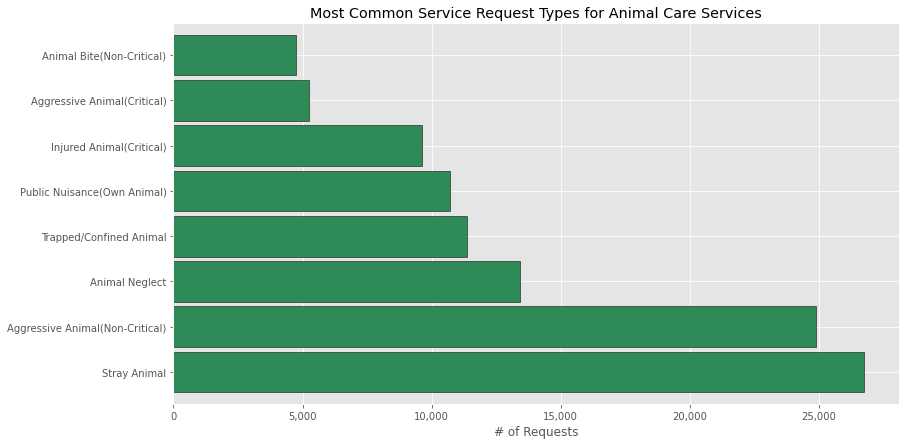

In [13]:
(
    # comment out / switch the filter statement to view different departments
    df.filter(expr('department == "Animal Care Services"'))
    .groupby("service_request_type")
    .count()
    .sort(desc("count"))
    .limit(8)
    .toPandas()
    .set_index("service_request_type")["count"]
    .plot.barh(color="seagreen", width=0.9, ec="black")
)

plt.gca().set(
    ylabel="",
    xlabel="# of Requests",
    title="Most Common Service Request Types for Animal Care Services",
)

# demonstrating several ways of formatting the x axis number ticks
# plt.gca().xaxis.set_major_formatter(mpl.ticker.FuncFormatter(format_number))
# plt.gca().xaxis.set_major_formatter(mpl.ticker.FuncFormatter(format_number_sub_thousands))
plt.gca().xaxis.set_major_formatter(mpl.ticker.FuncFormatter('{:,.0f}'.format))